Grupo 4 Integrantes (Nombre/Legajo): Salerno Camila (2393), Vega Sebastian (2352), Capo Pablo (2377), Farinazzo Analía (2365)

# Regresión Polinomial con  y sin Escalado  de los Predictores
## 1. Introducción
En este notebook, analizaremos el comportamiento de la Regresión Polinomial con y sin escalando las variables Predictoras. Aplicaremos 4 escalados distintos disponibles en la biblioteca Sklearn:
* StandardScaler
* MinMaxScaler
* RobustScaler
* MaxAbsScaler

Los datos que se utilizarán que se presentan en la siguiente gráfica y para generarlos se usará la siguiente fórmula en el intervalo [-5, 5]:

![ArbolRegresi%C3%B3n_datos.PNG](attachment:ArbolRegresi%C3%B3n_datos.PNG)

## 2. Regresión Polinomial con scikit-learn
La implementación de la regresión polinomial con scikit-learn es muy similar a la regresión lineal. Solo hay un paso adicional: debe transformar la matriz de entradas para incluir términos no lineales como 𝑥².
### 2.1. Importar paquetes y clases
Además de **numpy** y **sklearn.linear_model.LinearRegression**, también debe importar la clase **PolynomialFeaturesde sklearn.preprocessing**:

In [ ]:
# importamos las librerías que necesitamos
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(42) # para hacer el código reproducible

In [ ]:
#función y = 0.1x^2 + 0.2(Ruido Gaussiano)
def f(x):
    y = 0.1*np.square(x) + 0.6*np.random.randn(x.size)
    return y

In [ ]:
# Generamos los datos x, y con la función f(x)
x = np.arange(-5,5,0.1) # x = [-5, -4.9, -4.8, ... 4.8, 4.9, 5]
y = f(x)

<Axes: >

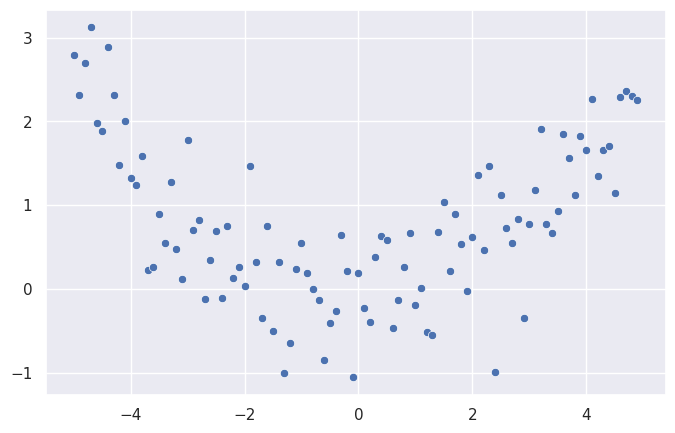

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize = (8, 5))
sns.scatterplot(x=x, y=y)

### 2.2. Regresión Polinomial

In [ ]:
# Creamos una instancia de esta clase indicando el grado de polinomio que deseamos:
transformer = PolynomialFeatures(degree=2, include_bias=False)

Arrancamos trabajando sin escalados.

In [ ]:
X_poly = transformer.fit_transform(x.reshape(-1, 1))

### 2.3. Dividimos el conjunto de datos en entrenamiento y prueba:
test_size=0.33, random_state=0

In [ ]:
# Dividimos el conjunto de datos en entrenamiento y prueba
test_size = 0.33
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=random_state)

### 2.4. Crear un modelo y entrenarlo

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
r_sq = model.score(X_test, y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6389843322057135


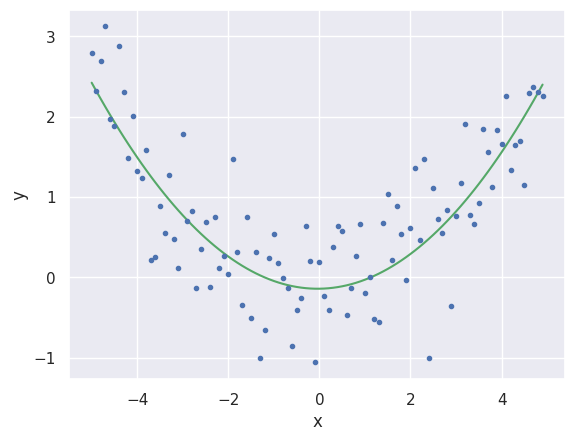

In [ ]:
# Representación gráfica de la función hipótesis generada
x1 = np.arange(-5,5,0.1)
y1 = model.coef_[1]*x1.reshape(-1, 1)**2 + model.coef_[0]*x1.reshape(-1, 1) + model.intercept_

plt.plot(x1, y1, "g-")  # estilo de linea solida verde
#plt.plot(df['X'], df['Y'], "b.")
plt.plot(x, y, "b.")  # círculos azules
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 2.5. Regresión Polinomial aplicando MinMaxScaler a todo los predictores Pre Procesados

In [ ]:
# Escalar los datos con MinMaxScaler
scaler_minmax = MinMaxScaler()
X_scaler = scaler_minmax.fit_transform(X_poly)

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaler, y, test_size=0.33, random_state=0)

# Crear y entrenar el modelo de regresión lineal
model2 = LinearRegression().fit(X_train1, y_train1)

# Calcular el coeficiente de determinación (r_sq)
r_sq_minMax = model2.score(X_test1, y_test1)

r_sq_minMax

0.6389843322057136

### 2.6. Regresión Polinomial aplicando StandardScaler a todo los predictores Pre Procesados

In [ ]:
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X_poly)

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_standard, y, test_size=0.33, random_state=0)

# Crear y entrenar el modelo de regresión lineal
model3 = LinearRegression().fit(X_train2, y_train2)

### mmmmm
model4 = SGDRegressor().fit(X_train2, y_train2)

# Calcular el coeficiente de determinación (r_sq_)
r_sq_standard = model3.score(X_test2, y_test2)
r_sq_sgd = model4.score(X_test2, y_test2)

print(r_sq_standard)
print(r_sq_sgd)

0.6389843322057135
0.6230416032942983


**Conclusiones**:
* Al calcular el coeficiente de determinación en los modelos de regresión polinominal, tanto habiendo aplicado diferentes escaladores, como no, se puede verificar que esta métrica, apenas sufrió modificaciones.  Esto, nos hace pensar que la escala de las características no afecta directamente la relación entre las variables en un modelo de regresión polinomial.
Este coeficiente de determinación (R^2) mide la proporción de la variación de la variable dependiente que es explicada por la variación de las variables independientes en el modelo. Entonces, entendemos que al aplicar diferentes escaladores a las características, se modifica la escala de las variables, pero la relación subyacente entre las variables no cambia significativamente lo que explicaría por qué el valor de R^2 apenas se ve afectado en los distintos modelos escalados.
